## ===== IMPORTS =====

In [1]:
import torch
import matplotlib.pyplot as plt

## ===== DATASET CREATION =====

In [2]:
print("📊 Creating Custom Dataset...")

# Creating input tensor
X = torch.tensor([[1, 0, 1, 0], 
                  [1, 0, 1, 1], 
                  [0, 1, 0, 1]], dtype=torch.float)

print('Input:')
print(X)
print('Shape of input:', X.shape)

📊 Creating Custom Dataset...
Input:
tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]])
Shape of input: torch.Size([3, 4])


In [3]:
# Convert input to matrix form (transpose)
X = X.t()
print('\nInput in matrix form:')
print(X)
print('Shape of input matrix:', X.shape)


Input in matrix form:
tensor([[1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])
Shape of input matrix: torch.Size([4, 3])


In [4]:
# Creating output tensor
y = torch.tensor([[1], [1], [0]], dtype=torch.float)
print('\nActual Output:')
print(y)


Actual Output:
tensor([[1.],
        [1.],
        [0.]])


In [5]:
# Output in matrix form (transpose)
y = y.t()
print('\nOutput in matrix form:')
print(y)
print('Shape of output:', y.shape)


Output in matrix form:
tensor([[1., 1., 0.]])
Shape of output: torch.Size([1, 3])


## ===== MODEL ARCHITECTURE =====

In [6]:
print("\n🏗️ Defining Model Architecture...")

# Number of neurons in each layer
input_layer_neurons = X.shape[0]  # 4 features
hidden_layer_neurons = 3
output_neurons = 1

print(f"Input neurons: {input_layer_neurons}")
print(f"Hidden neurons: {hidden_layer_neurons}")
print(f"Output neurons: {output_neurons}")


🏗️ Defining Model Architecture...
Input neurons: 4
Hidden neurons: 3
Output neurons: 1


## ===== WEIGHT INITIALIZATION =====

In [7]:
print("\n⚖️ Initializing Weights...")

# Weight matrices
w_input_hidden = torch.randn(input_layer_neurons, hidden_layer_neurons)
w_hidden_output = torch.randn(hidden_layer_neurons, output_neurons)

print("Weight shapes:")
print(f"w_input_hidden: {w_input_hidden.shape}")
print(f"w_hidden_output: {w_hidden_output.shape}")

print("\nInitial w_input_hidden:")
print(w_input_hidden)
print("\nInitial w_hidden_output:")
print(w_hidden_output)


⚖️ Initializing Weights...
Weight shapes:
w_input_hidden: torch.Size([4, 3])
w_hidden_output: torch.Size([3, 1])

Initial w_input_hidden:
tensor([[ 0.6655,  0.3280, -0.3604],
        [ 0.8558,  0.3673,  0.8234],
        [ 3.0736, -1.1368,  0.3140],
        [ 0.4151, -0.4712,  0.2417]])

Initial w_hidden_output:
tensor([[-1.4421],
        [-0.8250],
        [-0.0918]])


## ===== ACTIVATION FUNCTION =====

In [8]:
def sigmoid(s):
    """Sigmoid activation function"""
    return 1 / (1 + torch.exp(-s))

## ===== FORWARD PROPAGATION =====

In [9]:
print("\n🔄 Performing Forward Propagation...")

# Hidden layer calculations
hidden_layer_input = torch.matmul(w_input_hidden.t(), X)
hidden_layer_activations = sigmoid(hidden_layer_input)

print("Hidden layer activations shape:", hidden_layer_activations.shape)

# Output layer calculations
output_layer_input = torch.matmul(w_hidden_output.t(), hidden_layer_activations)
output = sigmoid(output_layer_input)

print("Model output:")
print(output)
print("Actual target:")
print(y)


🔄 Performing Forward Propagation...
Hidden layer activations shape: torch.Size([3, 3])
Model output:
tensor([[0.1535, 0.1612, 0.1700]])
Actual target:
tensor([[1., 1., 0.]])


## ===== CALCULATE ERROR =====

In [10]:
print("\n📉 Calculating Error...")
error = torch.pow(y - output, 2) / 2
print("Error for each sample:")
print(error)


📉 Calculating Error...
Error for each sample:
tensor([[0.3583, 0.3518, 0.0145]])


## ===== BACKWARD PROPAGATION =====

In [11]:
print("\n🔄 Performing Backward Propagation...")

# Learning rate
lr = 0.01


🔄 Performing Backward Propagation...


### --- Output Layer Gradients ---

In [12]:
print("\n📊 Calculating Output Layer Gradients...")

# Rate of change of error w.r.t output
error_wrt_output = -(y - output)

# Rate of change of output w.r.t Z2 (sigmoid derivative)
output_wrt_Z2 = torch.mul(output, (1 - output))

# Rate of change of Z2 w.r.t weights between hidden and output layer
Z2_wrt_who = hidden_layer_activations

# Rate of change of error w.r.t weights between hidden and output layer
error_wrt_who = torch.matmul(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).t())

print("Gradient for hidden-output weights calculated")


📊 Calculating Output Layer Gradients...
Gradient for hidden-output weights calculated


### --- Hidden Layer Gradients ---

In [13]:
print("\n📊 Calculating Hidden Layer Gradients...")

# Rate of change of Z2 w.r.t hidden layer activations
Z2_wrt_h1 = w_hidden_output

# Rate of change of hidden layer activations w.r.t Z1 (sigmoid derivative)
h1_wrt_Z1 = torch.mul(hidden_layer_activations, (1 - hidden_layer_activations))

# Rate of change of Z1 w.r.t weights between input and hidden layer
Z1_wrt_wih = X

# Rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = torch.matmul(Z1_wrt_wih, 
                            (h1_wrt_Z1 * torch.matmul(Z2_wrt_h1, 
                            (output_wrt_Z2 * error_wrt_output))).t())

print("Gradient for input-hidden weights calculated")


📊 Calculating Hidden Layer Gradients...
Gradient for input-hidden weights calculated


## ===== UPDATE WEIGHTS =====

In [14]:
print("\n🔄 Updating Weights...")

print("Weights before update:")
print("w_hidden_output:", w_hidden_output.flatten())
print("w_input_hidden:", w_input_hidden.flatten())


🔄 Updating Weights...
Weights before update:
w_hidden_output: tensor([-1.4421, -0.8250, -0.0918])
w_input_hidden: tensor([ 0.6655,  0.3280, -0.3604,  0.8558,  0.3673,  0.8234,  3.0736, -1.1368,
         0.3140,  0.4151, -0.4712,  0.2417])


### --- Update weights ---

In [15]:
w_hidden_output = w_hidden_output - lr * error_wrt_who
w_input_hidden = w_input_hidden - lr * error_wrt_wih

print("\nWeights after update:")
print("w_hidden_output:", w_hidden_output.flatten())
print("w_input_hidden:", w_input_hidden.flatten())


Weights after update:
w_hidden_output: tensor([-1.4401, -0.8245, -0.0908])
w_input_hidden: tensor([ 0.6654,  0.3277, -0.3604,  0.8559,  0.3674,  0.8234,  3.0735, -1.1372,
         0.3139,  0.4151, -0.4713,  0.2417])


## ===== COMPLETE TRAINING LOOP =====

In [16]:
print("\n🎯 Starting Complete Training...")

# Re-initialize weights for training
w_input_hidden = torch.randn(input_layer_neurons, hidden_layer_neurons, dtype=torch.float)
w_hidden_output = torch.randn(hidden_layer_neurons, output_neurons, dtype=torch.float)

# Training parameters
lr = 0.01
epochs = 10000

print(f"Training for {epochs} epochs with learning rate {lr}")

# Store errors for plotting
error_epoch = []

print("\nInitial weights:")
print("w_input_hidden:", w_input_hidden.flatten())
print("w_hidden_output:", w_hidden_output.flatten())


🎯 Starting Complete Training...
Training for 10000 epochs with learning rate 0.01

Initial weights:
w_input_hidden: tensor([ 0.3749, -0.5951,  1.3088, -1.5283,  1.3467, -0.7338,  0.1540, -1.4488,
        -0.8916,  0.6199, -0.6063, -1.6517])
w_hidden_output: tensor([ 0.4677,  0.3556, -1.1606])


### --- Training loop ---

In [17]:
for epoch in range(epochs):
    # === FORWARD PROPAGATION ===
    # Hidden layer
    hidden_layer_input = torch.matmul(w_input_hidden.t(), X)
    hidden_layer_activations = sigmoid(hidden_layer_input)
    
    # Output layer
    output_layer_input = torch.matmul(w_hidden_output.t(), hidden_layer_activations)
    output = sigmoid(output_layer_input)
    
    # === CALCULATE ERROR ===
    error = torch.pow(y - output, 2) / 2
    mean_error = torch.mean(error)
    error_epoch.append(mean_error.item())
    
    # === BACKWARD PROPAGATION ===
    # Output layer gradients
    error_wrt_output = -(y - output)
    output_wrt_Z2 = torch.mul(output, (1 - output))
    Z2_wrt_who = hidden_layer_activations
    error_wrt_who = torch.matmul(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).t())
    
    # Hidden layer gradients
    Z2_wrt_h1 = w_hidden_output
    h1_wrt_Z1 = torch.mul(hidden_layer_activations, (1 - hidden_layer_activations))
    Z1_wrt_wih = X
    error_wrt_wih = torch.matmul(Z1_wrt_wih, 
                                (h1_wrt_Z1 * torch.matmul(Z2_wrt_h1, 
                                (output_wrt_Z2 * error_wrt_output))).t())
    
    # === UPDATE WEIGHTS ===
    w_hidden_output = w_hidden_output - lr * error_wrt_who
    w_input_hidden = w_input_hidden - lr * error_wrt_wih
    
    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Error = {mean_error.item():.6f}")

Epoch 0: Error = 0.148926
Epoch 1000: Error = 0.068565
Epoch 2000: Error = 0.035581
Epoch 3000: Error = 0.019815
Epoch 4000: Error = 0.012529
Epoch 5000: Error = 0.008792
Epoch 6000: Error = 0.006633
Epoch 7000: Error = 0.005263
Epoch 8000: Error = 0.004330
Epoch 9000: Error = 0.003660


## ===== RESULTS =====

In [18]:
print("\n📈 Training Completed!")
print("\nFinal weights:")
print("w_input_hidden:", w_input_hidden.flatten())
print("w_hidden_output:", w_hidden_output.flatten())

print("\nFinal output from model:")
print(output)

print("\nActual target:")
print(y)

print("\nFinal error for each sample:")
print(error)


📈 Training Completed!

Final weights:
w_input_hidden: tensor([ 1.3152e+00, -8.6491e-01,  8.0595e-01, -2.5327e+00,  2.0566e+00,
        -5.2457e-01,  1.0943e+00, -1.7185e+00, -1.3944e+00, -2.5092e-02,
        -9.1450e-04, -1.5825e+00])
w_hidden_output: tensor([ 3.1683, -2.6831, -0.2585])

Final output from model:
tensor([[0.9325, 0.9362, 0.1017]])

Actual target:
tensor([[1., 1., 0.]])

Final error for each sample:
tensor([[0.0023, 0.0020, 0.0052]])


## ===== VISUALIZATION =====


📊 Plotting Training Progress...


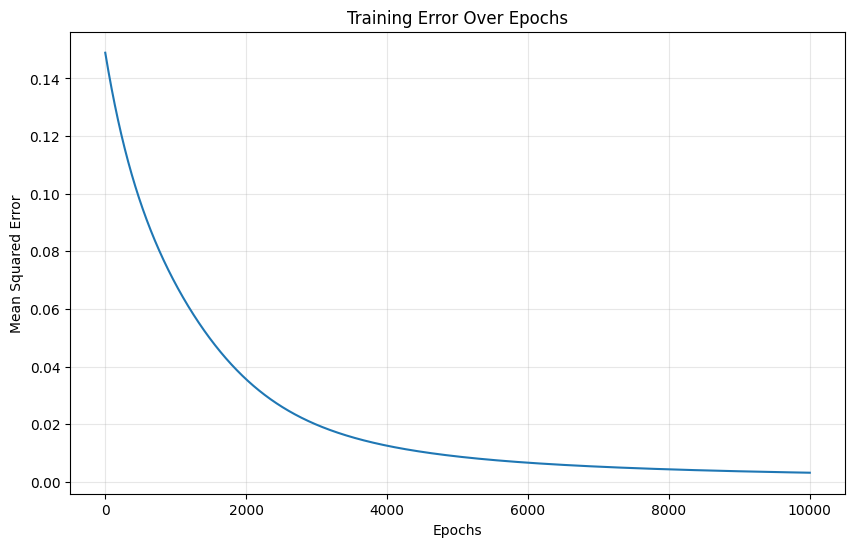

In [19]:
print("\n📊 Plotting Training Progress...")
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), error_epoch)
plt.title('Training Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.show()

## ===== PERFORMANCE ANALYSIS =====

In [20]:
print("\n🎯 Performance Analysis:")
final_predictions = (output > 0.5).float()
accuracy = torch.mean((final_predictions == y).float()) * 100
print(f"Final Accuracy: {accuracy.item():.2f}%")

print("\nPredictions vs Actual:")
for i in range(X.shape[1]):
    print(f"Sample {i+1}: Predicted = {output[0][i].item():.4f}, Actual = {y[0][i].item()}, Error = {error[0][i].item():.6f}")

print("\n✅ Neural Network Training Completed Successfully!")


🎯 Performance Analysis:
Final Accuracy: 100.00%

Predictions vs Actual:
Sample 1: Predicted = 0.9325, Actual = 1.0, Error = 0.002276
Sample 2: Predicted = 0.9362, Actual = 1.0, Error = 0.002035
Sample 3: Predicted = 0.1017, Actual = 0.0, Error = 0.005169

✅ Neural Network Training Completed Successfully!
